# 🔄 Chapter 10: Dynamic Programming

Welcome to the fascinating world of **Dynamic Programming** - where optimal solutions emerge from breaking down complex problems into simpler subproblems!

This interactive notebook will help you master:
- The core principles of dynamic programming (optimal substructure and overlapping subproblems)
- Memoization (top-down) vs Tabulation (bottom-up) approaches
- Classic DP problems with step-by-step visualizations
- Performance comparisons and optimization insights

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Recognize when dynamic programming is applicable
- Implement both memoization and tabulation solutions
- Visualize DP tables and understand the computation flow
- Analyze DP algorithm time and space complexity
- Apply DP patterns to new optimization problems

In [1]:
# Import required libraries and setup
import sys
import os
sys.path.append('../')

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import pandas as pd

# Import our DP algorithms
from chapter_10_dynamic_programming.code.dp_algorithms import DynamicProgramming

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries and DP algorithms loaded successfully!")
print("🎯 Ready to explore dynamic programming!")

# Initialize DP class
dp = DynamicProgramming()

✅ Libraries and DP algorithms loaded successfully!
🎯 Ready to explore dynamic programming!


## 📚 Section 1: DP Fundamentals

### The Two Key Principles

1. **Optimal Substructure**: An optimal solution to the problem contains optimal solutions to subproblems
2. **Overlapping Subproblems**: The same subproblems are solved multiple times

### Two Main Approaches
- **Memoization (Top-Down)**: Recursive with caching
- **Tabulation (Bottom-Up)**: Iterative with table filling

## 🌀 Section 2: Fibonacci Sequence Evolution

The Fibonacci sequence is the perfect introduction to DP - it shows the dramatic improvement from exponential to linear time!

In [4]:
# Interactive Fibonacci explorer
def create_fibonacci_explorer():
    """Interactive Fibonacci computation explorer"""
    n_slider = widgets.IntSlider(
        value=10,
        min=1,
        max=50,
        step=1,
        description='n:',
        continuous_update=False
    )
    method_selector = widgets.RadioButtons(
        options=['Naive Recursion', 'Memoization', 'Tabulation'],
        value='Memoization',
        description='Method:',
        disabled=False
    )
    output_area = widgets.Output()
    plot_area = widgets.Output()
    def compute_fibonacci(b):
        with output_area:
            clear_output(wait=True)
            n = n_slider.value
            method = method_selector.value
            print(f"Computing Fibonacci({n}) using {method}")
            print("=" * 50)
            start_time = time.time()
            try:
                if method == 'Naive Recursion':
                    if n > 35:
                        print("⚠️  n too large for naive recursion (would be very slow)")
                        return
                    result = dp.fibonacci_naive(n)
                elif method == 'Memoization':
                    result = dp.fibonacci_memoization(n)
                else:  # Tabulation
                    result = dp.fibonacci_tabulation(n)
                computation_time = time.time() - start_time
                print(f"Result: {result:,}")
                print(f"Time: {computation_time:.6f} seconds")
                # Complexity analysis
                if method == 'Naive Recursion':
                    complexity = f"O(2^{n}) time, O(n) space"
                else:
                    complexity = f"O(n) time, O(n) space"
                print(f"Complexity: {complexity}")
            except RecursionError:
                print("❌ Recursion limit exceeded!")
                print("Use memoization or tabulation for large n.")
    def visualize_dp_table(b):
        with plot_area:
            clear_output(wait=True)
            n = min(n_slider.value, 20)  # Limit for visualization
            # Create DP table
            fib_sequence = [dp.fibonacci_tabulation(i) for i in range(n + 1)]
            plt.figure(figsize=(12, 6))
            # Bar chart
            plt.subplot(1, 2, 1)
            bars = plt.bar(range(n + 1), fib_sequence, 
                          color=plt.cm.viridis(np.linspace(0, 1, n+1)),
                          alpha=0.7)
            plt.xlabel('n')
            plt.ylabel('Fibonacci value')
            plt.title(f'DP Table: Fibonacci(0) to Fibonacci({n})')
            plt.grid(True, alpha=0.3)
            # Add value labels on bars
            for i, v in enumerate(fib_sequence):
                if v < 1000:  # Only label small values
                    plt.text(i, v + max(fib_sequence)*0.01, str(v), 
                           ha='center', va='bottom', fontsize=8)
            # Growth rate
            plt.subplot(1, 2, 2)
            ratios = [fib_sequence[i+1]/fib_sequence[i] for i in range(1, len(fib_sequence)-1)]
            plt.plot(range(1, len(ratios)+1), ratios, 'bo-', linewidth=2)
            plt.axhline(y=(1 + np.sqrt(5))/2, color='red', linestyle='--', 
                       label=f'Golden ratio ≈ {(1 + np.sqrt(5))/2:.6f}')
            plt.xlabel('n')
            plt.ylabel('Growth ratio F(n+1)/F(n)')
            plt.title('Convergence to Golden Ratio')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    compute_button = widgets.Button(description='Compute')
    compute_button.on_click(compute_fibonacci)
    visualize_button = widgets.Button(description='Visualize DP Table')
    visualize_button.on_click(visualize_dp_table)
    # Layout
    controls = widgets.VBox([
        widgets.HBox([n_slider, method_selector]),
        widgets.HBox([compute_button, visualize_button])
    ])
    display(widgets.VBox([controls, widgets.HBox([output_area, plot_area])]))
    # Initial computation
    compute_fibonacci(None)
    visualize_dp_table(None)

print("🎮 Interactive Fibonacci Explorer")
print("Experiment with different values of n and computation methods:")
create_fibonacci_explorer()

🎮 Interactive Fibonacci Explorer
Experiment with different values of n and computation methods:


## 🎒 Section 3: 0/1 Knapsack Problem

The 0/1 Knapsack is a classic optimization problem where we maximize value while staying within weight constraints.

=== 0/1 KNAPSACK PROBLEM ===

Knapsack Capacity: 6 kg
Available Items:
Name		Weight	Value
------------------------------
Laptop      	3	2000
Book        	1	150
Water Bottle	2	300
Phone       	1	800
Headphones  	1	400
Tablet      	2	1200

🎯 Maximum Value: $4,000

Selected Items:
- Laptop (weight: 3, value: $2,000)
- Phone (weight: 1, value: $800)
- Tablet (weight: 2, value: $1,200)
Total Weight: 6/6 kg


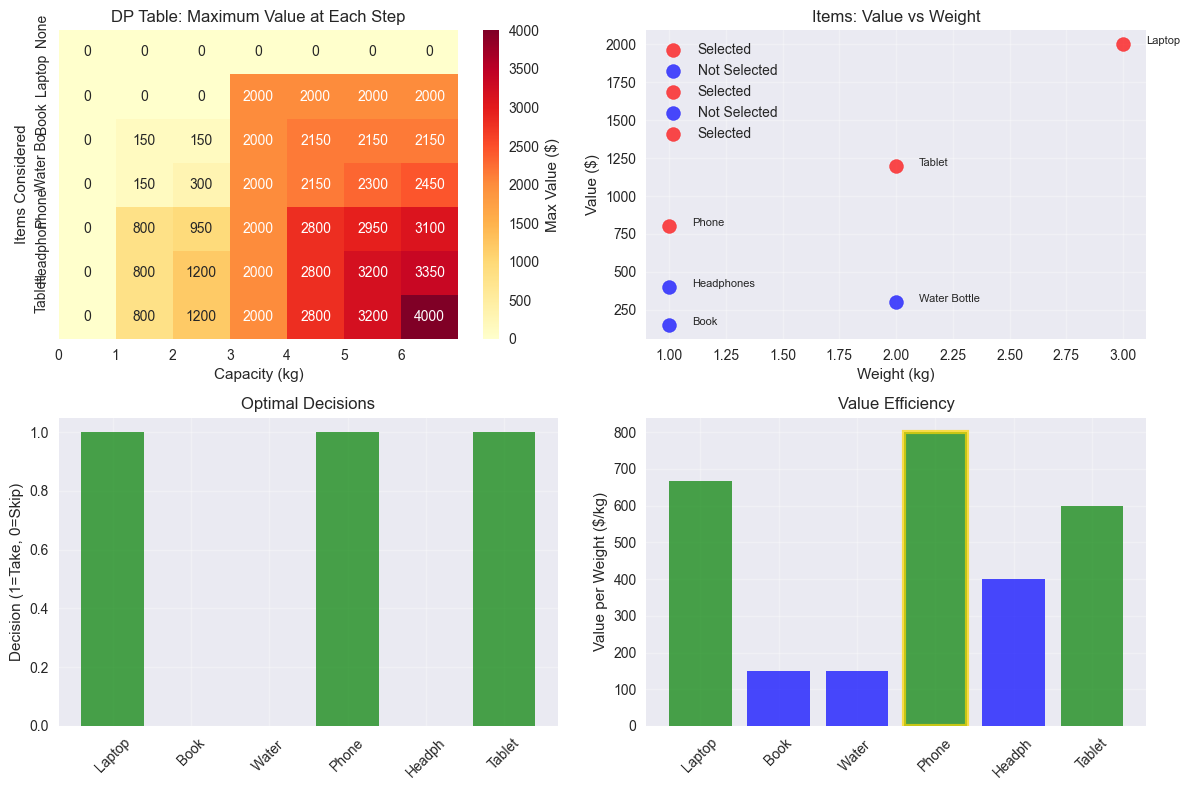


🎯 Key Insights:
- DP finds globally optimal solution
- Greedy algorithm (highest value/weight) might fail
- DP table shows optimal value for every subproblem
- Time: O(nW), Space: O(nW) where W is capacity


In [5]:
# Interactive Knapsack visualization
print("=== 0/1 KNAPSACK PROBLEM ===\n")

# Example items
items = [
    {"name": "Laptop", "weight": 3, "value": 2000},
    {"name": "Book", "weight": 1, "value": 150},
    {"name": "Water Bottle", "weight": 2, "value": 300},
    {"name": "Phone", "weight": 1, "value": 800},
    {"name": "Headphones", "weight": 1, "value": 400},
    {"name": "Tablet", "weight": 2, "value": 1200},
]

capacity = 6

print(f"Knapsack Capacity: {capacity} kg")
print("Available Items:")
print("Name\t\tWeight\tValue")
print("-" * 30)
for item in items:
    print(f"{item['name']:12}\t{item['weight']}\t{item['value']}")

# Extract data for DP
weights = [item['weight'] for item in items]
values = [item['value'] for item in items]

# Solve with both approaches
max_value_memo, selected_memo = dp.knapsack_01_memoization(weights, values, capacity)
max_value_tab, selected_tab = dp.knapsack_01_tabulation(weights, values, capacity)

# Create DP table for visualization
n = len(weights)
dp_table = [[0] * (capacity + 1) for _ in range(n + 1)]

# Fill the table (same logic as in the method)
for i in range(1, n + 1):
    for w in range(capacity + 1):
        # Don't take item i
        dp_table[i][w] = dp_table[i-1][w]

        # Take item i if it fits
        if weights[i-1] <= w:
            dp_table[i][w] = max(dp_table[i][w], values[i-1] + dp_table[i-1][w - weights[i-1]])

print(f"\n🎯 Maximum Value: ${max_value_memo:,}")
print("\nSelected Items:")
total_weight = 0
for i in selected_memo:  # selected_memo contains indices of selected items
    print(f"- {items[i]['name']} (weight: {items[i]['weight']}, value: ${items[i]['value']:,})")
    total_weight += items[i]['weight']
print(f"Total Weight: {total_weight}/{capacity} kg")

# Visualize DP table
plt.figure(figsize=(12, 8))

# Heatmap of DP table
plt.subplot(2, 2, 1)
sns.heatmap(dp_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Max Value ($)'})
plt.xlabel('Capacity (kg)')
plt.ylabel('Items Considered')
plt.title('DP Table: Maximum Value at Each Step')
plt.xticks(range(capacity + 1), range(capacity + 1))
plt.yticks(range(len(items) + 1), ['None'] + [item['name'][:8] for item in items])

# Value vs Weight scatter plot
plt.subplot(2, 2, 2)
weights_plot = [item['weight'] for item in items]
values_plot = [item['value'] for item in items]
# Convert selected indices to boolean array
selected_bool = [i in selected_memo for i in range(len(items))]
colors = ['red' if selected else 'blue' for selected in selected_bool]
labels = ['Selected' if selected else 'Not Selected' for selected in selected_bool]

for i, item in enumerate(items):
    plt.scatter(item['weight'], item['value'], 
               c=colors[i], s=100, alpha=0.7,
               label=labels[i] if i == 0 or labels[i] != labels[i-1] else "")
    plt.text(item['weight'] + 0.1, item['value'], item['name'], fontsize=8)

plt.xlabel('Weight (kg)')
plt.ylabel('Value ($)')
plt.title('Items: Value vs Weight')
plt.legend()
plt.grid(True, alpha=0.3)

# Decision tree visualization (conceptual)
plt.subplot(2, 2, 3)
# This would be complex to implement, so we'll show a simplified version
decisions = ['Skip'] * len(items)  # Default to skip
for i in selected_memo:  # selected_memo contains indices of selected items
    decisions[i] = 'Take'

plt.bar(range(len(items)), [1 if decision == 'Take' else 0 for decision in decisions], 
       color=['green' if decision == 'Take' else 'red' for decision in decisions],
       alpha=0.7)
plt.xticks(range(len(items)), [item['name'][:6] for item in items], rotation=45)
plt.ylabel('Decision (1=Take, 0=Skip)')
plt.title('Optimal Decisions')
plt.grid(True, alpha=0.3)

# Value efficiency
plt.subplot(2, 2, 4)
efficiency = [item['value'] / item['weight'] for item in items]
bars = plt.bar(range(len(items)), efficiency, 
              color=['green' if i in selected_memo else 'blue' for i in range(len(items))],
              alpha=0.7)
plt.xticks(range(len(items)), [item['name'][:6] for item in items], rotation=45)
plt.ylabel('Value per Weight ($/kg)')
plt.title('Value Efficiency')
plt.grid(True, alpha=0.3)

# Highlight greedy choice
best_greedy_idx = np.argmax(efficiency)
bars[best_greedy_idx].set_edgecolor('gold')
bars[best_greedy_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- DP finds globally optimal solution")
print("- Greedy algorithm (highest value/weight) might fail")
print("- DP table shows optimal value for every subproblem")
print("- Time: O(nW), Space: O(nW) where W is capacity")

## 📝 Section 4: More DP Problems

Let's explore additional classic DP problems with interactive visualizations.

=== LONGEST COMMON SUBSEQUENCE ===

Finding LCS between: 'AGGTAB' and 'GXTXAYB'

Length of LCS: 4
LCS: 'GTAB'


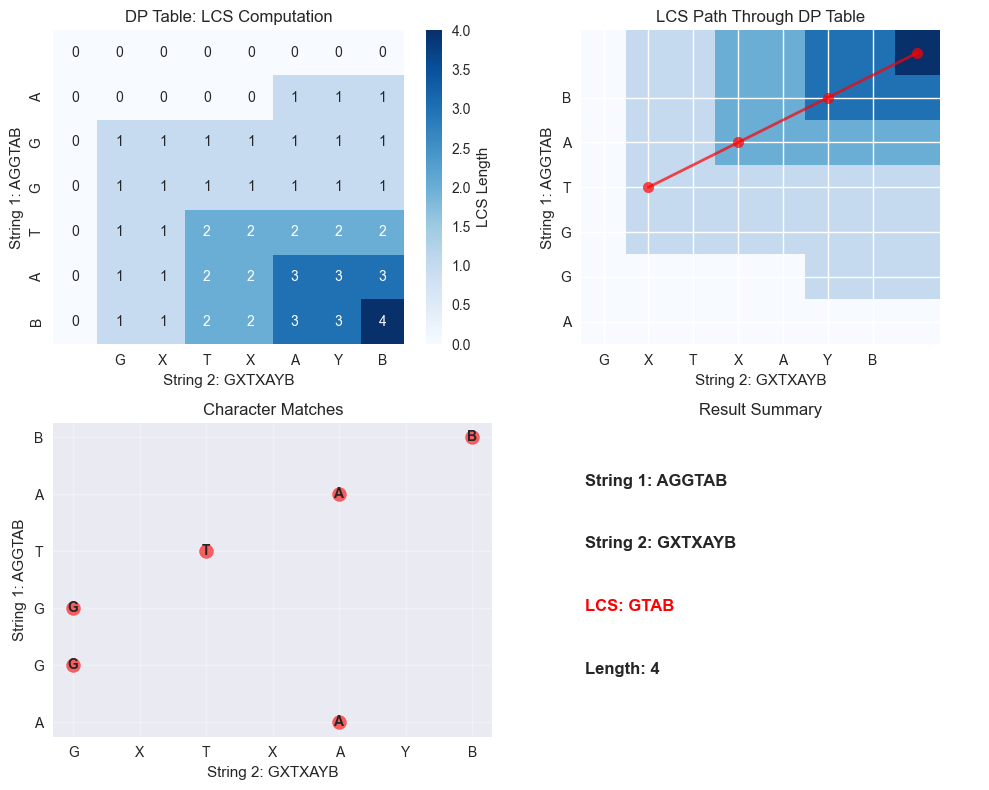


🎯 Key Insights:
- LCS finds longest sequence present in both strings
- Order must be preserved (not substring)
- DP table stores lengths of LCS for all prefixes
- Time: O(mn), Space: O(mn) where m,n are string lengths


In [7]:
# Longest Common Subsequence
print("=== LONGEST COMMON SUBSEQUENCE ===\n")

def lcs_interactive_demo():
    """Interactive LCS demonstration"""
    
    string1 = "AGGTAB"
    string2 = "GXTXAYB"
    
    print(f"Finding LCS between: '{string1}' and '{string2}'")
    
    length, subsequence = dp.longest_common_subsequence(string1, string2)
    
    print(f"\nLength of LCS: {length}")
    print(f"LCS: '{subsequence}'")
    
    # Create DP table
    m, n = len(string1), len(string2)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Fill DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if string1[i-1] == string2[j-1]:
                dp_table[i][j] = dp_table[i-1][j-1] + 1
            else:
                dp_table[i][j] = max(dp_table[i-1][j], dp_table[i][j-1])
    
    # Visualize
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 2, 1)
    sns.heatmap(dp_table, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[''] + list(string2),
                yticklabels=[''] + list(string1),
                cbar_kws={'label': 'LCS Length'})
    plt.title('DP Table: LCS Computation')
    plt.xlabel(f'String 2: {string2}')
    plt.ylabel(f'String 1: {string1}')
    
    # Highlight the path
    plt.subplot(2, 2, 2)
    # Show the actual LCS characters
    y_positions = []
    x_positions = []
    
    i, j = m, n
    while i > 0 and j > 0:
        if string1[i-1] == string2[j-1]:
            y_positions.append(i)
            x_positions.append(j)
            i -= 1
            j -= 1
        elif dp_table[i-1][j] > dp_table[i][j-1]:
            i -= 1
        else:
            j -= 1
    
    plt.plot(x_positions, y_positions, 'ro-', linewidth=2, markersize=8, alpha=0.7)
    plt.imshow(dp_table, cmap='Blues', origin='lower')
    plt.xticks(range(len(string2)), list(string2))
    plt.yticks(range(len(string1)), list(string1))
    plt.title('LCS Path Through DP Table')
    plt.xlabel(f'String 2: {string2}')
    plt.ylabel(f'String 1: {string1}')
    
    # Character matching visualization
    plt.subplot(2, 2, 3)
    matches = []
    for i, c1 in enumerate(string1):
        for j, c2 in enumerate(string2):
            if c1 == c2:
                matches.append((i, j, c1))
    
    plt.scatter([m[1] for m in matches], [m[0] for m in matches], 
               c='red', s=100, alpha=0.6)
    
    # Add character labels
    for i, j, char in matches:
        plt.text(j, i, char, ha='center', va='center', fontweight='bold')
    
    plt.xticks(range(len(string2)), list(string2))
    plt.yticks(range(len(string1)), list(string1))
    plt.title('Character Matches')
    plt.xlabel(f'String 2: {string2}')
    plt.ylabel(f'String 1: {string1}')
    plt.grid(True, alpha=0.3)
    
    # LCS sequence
    plt.subplot(2, 2, 4)
    plt.text(0.1, 0.8, f"String 1: {string1}", fontsize=12, fontweight='bold')
    plt.text(0.1, 0.6, f"String 2: {string2}", fontsize=12, fontweight='bold')
    plt.text(0.1, 0.4, f"LCS: {subsequence}", fontsize=12, fontweight='bold', color='red')
    plt.text(0.1, 0.2, f"Length: {length}", fontsize=12, fontweight='bold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('Result Summary')
    
    plt.tight_layout()
    plt.show()

lcs_interactive_demo()

print("\n🎯 Key Insights:")
print("- LCS finds longest sequence present in both strings")
print("- Order must be preserved (not substring)")
print("- DP table stores lengths of LCS for all prefixes")
print("- Time: O(mn), Space: O(mn) where m,n are string lengths")

=== COIN CHANGE PROBLEM ===

Making $37 with coin denominations: [1, 2, 5, 10, 20, 50, 100]

Minimum coins needed: 4
Number of ways to make $37: 188


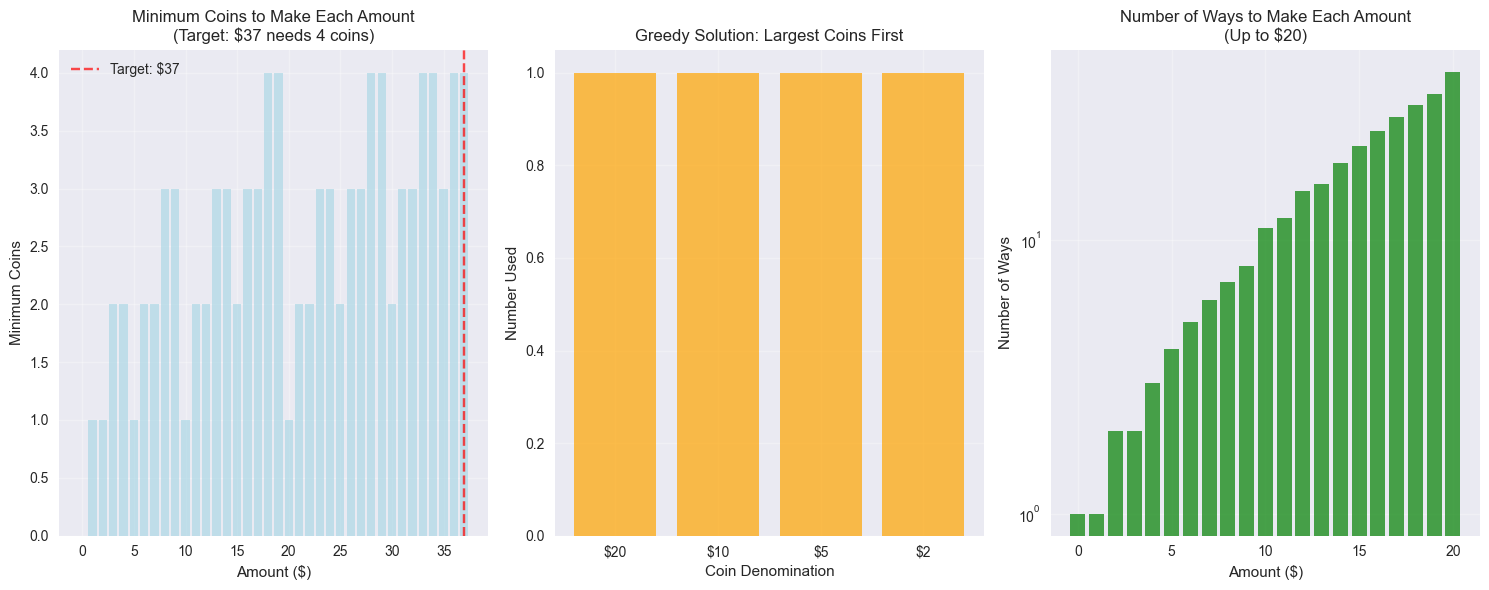


🎯 Key Insights:
- Coin change demonstrates both counting and optimization
- Greedy works for canonical coin systems (like US coins)
- DP handles any coin system and gives optimal solutions
- 'Ways' problem shows counting with DP is powerful but exponential


In [8]:
# Coin Change Problem
print("=== COIN CHANGE PROBLEM ===\n")

def coin_change_demo():
    """Interactive coin change demonstration"""
    coins = [1, 2, 5, 10, 20, 50, 100]  # US coin denominations
    amount = 37
    print(f"Making ${amount} with coin denominations: {coins}")
    # Minimum coins
    min_coins = dp.coin_change_minimum(coins, amount)
    print(f"\nMinimum coins needed: {min_coins}")
    # Number of ways
    ways = dp.coin_change_ways(coins, amount)
    print(f"Number of ways to make ${amount}: {ways:,}")
    # Create DP table for minimum coins
    dp_table = [float('inf')] * (amount + 1)
    dp_table[0] = 0
    for coin in coins:
        for i in range(coin, amount + 1):
            dp_table[i] = min(dp_table[i], dp_table[i - coin] + 1)
    # Visualize
    plt.figure(figsize=(15, 6))
    # Minimum coins table
    plt.subplot(1, 3, 1)
    plt.bar(range(amount + 1), [min(x, 10) for x in dp_table],  # Cap for visualization
           color='lightblue', alpha=0.7)
    plt.xlabel('Amount ($)')
    plt.ylabel('Minimum Coins')
    plt.title(f'Minimum Coins to Make Each Amount\n(Target: ${amount} needs {min_coins} coins)')
    plt.grid(True, alpha=0.3)
    plt.axvline(x=amount, color='red', linestyle='--', alpha=0.7, label=f'Target: ${amount}')
    plt.legend()
    # Coin usage analysis
    plt.subplot(1, 3, 2)
    coin_usage = {}
    remaining = amount
    for coin in sorted(coins, reverse=True):
        if remaining >= coin:
            count = remaining // coin
            coin_usage[coin] = count
            remaining %= coin
    plt.bar([f'${c}' for c in coin_usage.keys()], coin_usage.values(), 
           color='orange', alpha=0.7)
    plt.xlabel('Coin Denomination')
    plt.ylabel('Number Used')
    plt.title('Greedy Solution: Largest Coins First')
    plt.grid(True, alpha=0.3)
    # Ways to make amount (for small amounts)
    plt.subplot(1, 3, 3)
    small_amount = min(amount, 20)  # Limit for computation
    ways_list = []
    for a in range(small_amount + 1):
        ways_a = dp.coin_change_ways(coins, a)
        ways_list.append(min(ways_a, 1000))  # Cap for visualization
    plt.bar(range(small_amount + 1), ways_list, color='green', alpha=0.7)
    plt.xlabel('Amount ($)')
    plt.ylabel('Number of Ways')
    plt.title(f'Number of Ways to Make Each Amount\n(Up to ${small_amount})')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

coin_change_demo()

print("\n🎯 Key Insights:")
print("- Coin change demonstrates both counting and optimization")
print("- Greedy works for canonical coin systems (like US coins)")
print("- DP handles any coin system and gives optimal solutions")
print("- 'Ways' problem shows counting with DP is powerful but exponential")

## 🎯 Summary & Key Takeaways

### DP Problem-Solving Framework

1. **Identify the subproblems** - Break problem into smaller, independent pieces
2. **Define the recurrence relation** - How subproblems relate to each other
3. **Choose memoization OR tabulation** - Top-down vs bottom-up approach
4. **Handle base cases** - Ensure recursion terminates properly
5. **Optimize space** - Often can reduce from O(n²) to O(n)

### Common DP Patterns

| Pattern | Examples | Key Insight |
|---------|----------|-------------|
| **1D Optimization** | Fibonacci, Stair climbing | Build from base cases |
| **2D Table** | Knapsack, LCS, Edit distance | Compare sequences/matrices |
| **Interval DP** | Matrix chain multiplication | Break into subintervals |
| **State Machine** | House robber, Best time to buy/sell | Track state transitions |
| **Counting** | Coin change ways, Paths in grid | Count all possibilities |

### Time & Space Complexity

- **Fibonacci**: O(n) time, O(n) space (can optimize to O(1))
- **Knapsack**: O(nW) time, O(nW) space where W is capacity
- **LCS/Edit Distance**: O(mn) time, O(mn) space
- **Coin Change**: O(amount × coins) time, O(amount) space

### When to Use DP

✅ **Use DP when:**
- Problem has optimal substructure
- Overlapping subproblems exist
- Greedy algorithms fail
- Need all solutions (counting) or optimal solution

❌ **Don't use DP when:**
- No overlapping subproblems (use divide & conquer)
- Problem is too large (NP-hard, exponential time)
- Simple greedy algorithm works

### Next Steps

- **Chapter 11**: Binary Search - Another fundamental algorithm
- **Chapter 12-14**: Sorting algorithms - Compare with DP approaches
- **Chapter 20-21**: Graph algorithms - Many use DP principles
- **Practice**: LeetCode DP problems, implement more algorithms

## 🧪 Practice Problems

Try solving these classic DP problems:
1. **Climbing Stairs** - How many ways to climb n stairs (1 or 2 steps)
2. **House Robber** - Maximize robbery without adjacent houses
3. **Word Break** - Can string be segmented into dictionary words
4. **Minimum Path Sum** - Find path with minimum sum in grid
5. **Unique Paths** - Number of ways to go from top-left to bottom-right

**Remember**: DP is about recognizing patterns and building solutions incrementally! 🔄